***Processo Seletivo para Analista de dados júnior***

***Case Star Wars***

Candidata : ***Paula Macedo da Cruz***

Data : 12/11/2021 


***1. Importação de bibliotecas***







In [ ]:
import sqlite3
import pandas as pd
from matplotlib import pyplot as plt

***2.Tratamento dataset***

Leitura do arquivo

In [ ]:
csv = 'SW_Case.csv'
data = pd.read_csv(csv, sep=';', encoding='utf-8')

Criação da coluna ID que servirá de identificador para cada tupla do csv.

In [ ]:
data.insert(0, 'ID', range(1, 1+len(data)), True)

In [ ]:
data.head()

,ID,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38
0,1,"1,63E-300",Yes,Yes,1,1,1,1,1,1,3.0,2.0,1.0,4.0,5.0,6.0,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
1,2,"1,63E-301",No,NaN,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3,"1,63E-300",Yes,No,1,1,1,0,0,0,1.0,2.0,3.0,4.0,5.0,6.0,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,4,"1,63E-300",Yes,Yes,1,1,1,1,1,1,5.0,6.0,1.0,2.0,4.0,3.0,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,5,"1,63E-300",Yes,Yes,1,1,1,1,1,1,5.0,4.0,6.0,2.0,1.0,3.0,Very favorably,Somewhat favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very unfavorably,Somewhat favorably,Neither favorably nor unfavorably (neutral),Very favorably,Somewhat favorably,Somewhat favorably,Very unfavorably,Somewhat favorably,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


Para facilitar a busca futuramente, convertemos as possíveis respostas da seguinte forma: 

5 Very favorably                                 
4 Somewhat favorably                            
3 Neither favorably nor unfavorably (neutral)     
2 Somewhat unfavorably                            
1 Very unfavorably 

0 Unfamiliar (N/A) 

In [ ]:
data['V16'].replace({"Very favorably": 5, "Somewhat favorably": 4, 'Neither favorably nor unfavorably (neutral)' : 3, 'Somewhat unfavorably' : 2 , 'Very unfavorably' :1, 'Unfamiliar (N/A)' : 0   }, inplace=True)
data['V17'].replace({"Very favorably": 5, "Somewhat favorably": 4, 'Neither favorably nor unfavorably (neutral)' : 3, 'Somewhat unfavorably' : 2 , 'Very unfavorably' :1, 'Unfamiliar (N/A)' : 0   }, inplace=True) 	
data['V18'].replace({"Very favorably": 5, "Somewhat favorably": 4, 'Neither favorably nor unfavorably (neutral)' : 3, 'Somewhat unfavorably' : 2 , 'Very unfavorably' :1, 'Unfamiliar (N/A)' : 0   }, inplace=True)
data['V19'].replace({"Very favorably": 5, "Somewhat favorably": 4, 'Neither favorably nor unfavorably (neutral)' : 3, 'Somewhat unfavorably' : 2 , 'Very unfavorably' :1, 'Unfamiliar (N/A)' : 0   }, inplace=True)
data['V20'].replace({"Very favorably": 5, "Somewhat favorably": 4, 'Neither favorably nor unfavorably (neutral)' : 3, 'Somewhat unfavorably' : 2 , 'Very unfavorably' :1, 'Unfamiliar (N/A)' : 0   }, inplace=True) 	
data['V21'].replace({"Very favorably": 5, "Somewhat favorably": 4, 'Neither favorably nor unfavorably (neutral)' : 3, 'Somewhat unfavorably' : 2 , 'Very unfavorably' :1, 'Unfamiliar (N/A)' : 0   }, inplace=True)
data['V22'].replace({"Very favorably": 5, "Somewhat favorably": 4, 'Neither favorably nor unfavorably (neutral)' : 3, 'Somewhat unfavorably' : 2 , 'Very unfavorably' :1, 'Unfamiliar (N/A)' : 0   }, inplace=True)
data['V23'].replace({"Very favorably": 5, "Somewhat favorably": 4, 'Neither favorably nor unfavorably (neutral)' : 3, 'Somewhat unfavorably' : 2 , 'Very unfavorably' :1, 'Unfamiliar (N/A)' : 0   }, inplace=True)
data['V24'].replace({"Very favorably": 5, "Somewhat favorably": 4, 'Neither favorably nor unfavorably (neutral)' : 3, 'Somewhat unfavorably' : 2 , 'Very unfavorably' :1, 'Unfamiliar (N/A)' : 0   }, inplace=True)
data['V25'].replace({"Very favorably": 5, "Somewhat favorably": 4, 'Neither favorably nor unfavorably (neutral)' : 3, 'Somewhat unfavorably' : 2 , 'Very unfavorably' :1, 'Unfamiliar (N/A)' : 0   }, inplace=True)	
data['V26'].replace({"Very favorably": 5, "Somewhat favorably": 4, 'Neither favorably nor unfavorably (neutral)' : 3, 'Somewhat unfavorably' : 2 , 'Very unfavorably' :1, 'Unfamiliar (N/A)' : 0   }, inplace=True)
data['V27'].replace({"Very favorably": 5, "Somewhat favorably": 4, 'Neither favorably nor unfavorably (neutral)' : 3, 'Somewhat unfavorably' : 2 , 'Very unfavorably' :1, 'Unfamiliar (N/A)' : 0   }, inplace=True)
data['V28'].replace({"Very favorably": 5, "Somewhat favorably": 4, 'Neither favorably nor unfavorably (neutral)' : 3, 'Somewhat unfavorably' : 2 , 'Very unfavorably' :1, 'Unfamiliar (N/A)' : 0   }, inplace=True)
data['V29'].replace({"Very favorably": 5, "Somewhat favorably": 4, 'Neither favorably nor unfavorably (neutral)' : 3, 'Somewhat unfavorably' : 2 , 'Very unfavorably' :1, 'Unfamiliar (N/A)' : 0   }, inplace=True)

In [ ]:
data.head()

,ID,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38
0,1,"1,63E-300",Yes,Yes,1,1,1,1,1,1,3.0,2.0,1.0,4.0,5.0,6.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,0.0,0.0,5.0,5.0,5.0,5.0,5.0,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
1,2,"1,63E-301",No,NaN,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3,"1,63E-300",Yes,No,1,1,1,0,0,0,1.0,2.0,3.0,4.0,5.0,6.0,4.0,4.0,4.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,4,"1,63E-300",Yes,Yes,1,1,1,1,1,1,5.0,6.0,1.0,2.0,4.0,3.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,4.0,2.0,5.0,5.0,5.0,5.0,5.0,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,5,"1,63E-300",Yes,Yes,1,1,1,1,1,1,5.0,4.0,6.0,2.0,1.0,3.0,5.0,4.0,4.0,2.0,5.0,1.0,4.0,3.0,5.0,4.0,4.0,1.0,4.0,4.0,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [ ]:
data['V38'].value_counts()

East North Central    181
Pacific               175
South Atlantic        170
Middle Atlantic       122
West South Central    110
West North Central     93
Mountain               79
New England            75
East South Central     38
Name: V38, dtype: int64

SQLite tem limitações para lidar com NAN, então realizamos a conversão desses valores para None, para facilitar futuramente o processo de carregamento dos dados do csv para o banco.

In [ ]:
data = data.astype(object).where(pd.notnull(data), None)

In [ ]:
data.head()

,ID,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38
0,1,"1,63E-300",Yes,Yes,1,1,1,1,1,1,3,2,1,4,5,6,5,5,5,5,5,5,5,0,0,5,5,5,5,5,I don't understand this question,Yes,No,No,Male,18-29,None,High school degree,South Atlantic
1,2,"1,63E-301",No,None,0,0,0,0,0,0,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3,"1,63E-300",Yes,No,1,1,1,0,0,0,1,2,3,4,5,6,4,4,4,4,4,0,0,0,0,0,0,0,0,0,I don't understand this question,No,None,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,4,"1,63E-300",Yes,Yes,1,1,1,1,1,1,5,6,1,2,4,3,5,5,5,5,5,4,5,4,2,5,5,5,5,5,I don't understand this question,No,None,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,5,"1,63E-300",Yes,Yes,1,1,1,1,1,1,5,4,6,2,1,3,5,4,4,2,5,1,4,3,5,4,4,1,4,4,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


Criação de Dataframes auxiliares para permitir a criação de certas tabelas e facilitar a interpretação dos dados.

In [ ]:
movies = [(1 , 'A ameaça fantasma') , (2 ,  'O ataque dos clones') , (3 ,  'A vingança dos Sith'), (4, 'Uma nova esperança'), (5, 'O império contra-ataca'), (6, 'O retorno de Jedi')]


In [ ]:
dataFilm = pd.DataFrame(movies, columns=['id', 'name'])

In [ ]:
characters = [ (1, 'Han Solo'), (2,  'Luke Skywalker'), (3, 'Princesa Leia'), (4, 'Anakin Skywalker'), (5, 'Obi-Wan Kenobi'), (6, 'Imperador Palpatine'), (7, 'Darth Vader'), (8, 'Lando Calrissian'), (9, 'Boba Fett'), (10,'C3PO'), (11, 'R2D2'), (12, 'Jar Jar Binks'), (13, 'Padme Amidala'), (14, 'Yoda') ]

In [ ]:
dataCharacter = pd.DataFrame(characters, columns=['id', 'name'])

***3.Modelagem do banco***

Baseado no arquivo csv, realizamos a modelagem do Banco de Dados. Nesta modelagem, podemos identificar 4 entidades : Person, Film, Character and Shooting. Ao todo são criadas 6 tabelas a partir da modelagem, sendo estas : Person, Film, Evaluate_film, Character, Evaluate_character, Shooting.

In [ ]:
create_table_person = """CREATE TABLE IF NOT EXISTS Person (
	id integer PRIMARY KEY,
	idAnswer float,
  franchise char[5],
  fanStarWars char[5],
  fanStarTrek char[5],
	fanUniverso char[5],
	familiarizedUniverso char[5],
	gender text,
	ageGroup text,
	familyIncome text,
  educationalLevel text,
  localization text,
	UNIQUE(id)
	
); """

create_table_film = """CREATE TABLE IF NOT EXISTS Film (
	id integer PRIMARY KEY,
	name text NOT NULL	
);"""

create_table_evaluate_film = """CREATE TABLE IF NOT EXISTS Evaluate_film (
	grade integer,
  affirmation boolean NOT NULL,
  film_id integer,
  person_id integer,
	FOREIGN KEY (film_id) REFERENCES Film (id),
	FOREIGN KEY (person_id) REFERENCES Person (id)
);"""

create_table_character = """CREATE TABLE IF NOT EXISTS Character (
	id integer PRIMARY KEY,
	name text NOT NULL	
);"""

create_table_evaluate_character = """CREATE TABLE IF NOT EXISTS Evaluate_character (
	rating integer,
  character_id integer,
  person_id integer,
	FOREIGN KEY (character_id) REFERENCES Character (id),
	FOREIGN KEY (person_id) REFERENCES Person (id)
);"""

create_table_shooting = """CREATE TABLE IF NOT EXISTS Shooting (
  answerQuestion text,
  person_id integer,
	FOREIGN KEY (person_id) REFERENCES Person (id)
);"""

Criação e estabelecimento de conexão com o banco

In [ ]:
database = 'py_database_star_wars.db'

In [ ]:
def create_connection(databaseFile):
   
    connectionDatabase = None
    try:
        connectionDatabase = sqlite3.connect(databaseFile)
        return connectionDatabase
    except Error as e:
        print(e)

    return connectionDatabase

In [ ]:
connectionDatabase = create_connection(database)

Criação das tabelas do banco.

In [ ]:
def create_table(connectionDatabase, create_table_sql):
  
    try:
        curs = connectionDatabase.cursor()
        curs.execute(create_table_sql)
    except Error as e:
        print(e)

In [ ]:
if connectionDatabase is not None :
   
  create_table(connectionDatabase, create_table_person)
  create_table(connectionDatabase, create_table_film)
  create_table(connectionDatabase, create_table_evaluate_film)
  create_table(connectionDatabase, create_table_character)
  create_table(connectionDatabase, create_table_evaluate_character)
  create_table(connectionDatabase, create_table_shooting)

else:
  print(f'Error. Database was not created.')

Carregamento de informações dos Dataframes para o banco

In [ ]:
def upload_csv_table_person_db(curs):
  
  numberRows = len(data.index)
  for line in range(0, numberRows):
    row = data.iloc[line,[0, 1, 2, 3, 31, 32, 33, 34, 35, 36, 37, 38]]
    curs.execute("INSERT  INTO Person (id, idAnswer, franchise, fanStarWars, fanStarTrek, fanUniverso, familiarizedUniverso, gender, ageGroup, familyIncome, educationalLevel, localization ) VALUES (?, ?, ?, ?, ?, ?, ? ,? , ? ,?, ?, ?);", ((int(row[0]), str(row[1]), str(row[2]), str(row[3]), str(row[4]), str(row[5]), str(row[6]), str(row[7]), str(row[8]), str(row[9]), str(row[10]), str(row[11]))))

In [ ]:
def upload_csv_table_film_db(curs):
  
  numberRows = len(dataFilm.index)
  for line in range(0, numberRows):
    row = dataFilm.iloc[line,[0, 1]]
    curs.execute("INSERT INTO Film (id, name ) VALUES (?, ?);", ((int(row[0]), str(row[1]))))

In [ ]:
def fill_film(curs, line, firstColumn, secondColumn, lineFilm):
  
    row = data.iloc[line,[0, firstColumn , secondColumn ]]
    rowMovie = dataFilm.iloc[lineFilm,[0]]
    curs.execute("INSERT INTO Evaluate_film (grade, affirmation, film_id, person_id ) VALUES (?, ?, ?, ? );", ((str(row[2]), bool(row[1]), int(rowMovie[0]), int(row[0]))))

In [ ]:
def upload_csv_table_evaluate_film_db(curs):
  
  numberRows = len(data.index)
  y = len(dataFilm.index)
  for line in range(0, numberRows):
    for i, j, k in zip(range(4, 9), range(10,15), range(y)):
      fill_film(curs, line, i, j, k)

In [ ]:
def upload_csv_table_character_db(curs):
  
  numberRows = len(dataCharacter.index)
  for line in range(0, numberRows):
    row = dataCharacter.iloc[line,[0, 1]]
    curs.execute("INSERT INTO Character (id, name) VALUES (?, ?);", ((int(row[0]), str(row[1]))))

In [ ]:
def fill_character(curs, line, column, lineCharacter):
  
    row = data.iloc[line,[0, column]]
    rowCharacter = dataCharacter.iloc[lineCharacter,[0]]
    curs.execute("INSERT INTO Evaluate_character (rating, character_id, person_id ) VALUES (?, ?, ? );", ((str(row[1]), int(rowCharacter[0]), int(row[0]))))

In [ ]:
def upload_csv_table_evaluate_character_db(curs):
  
  numberRows = len(data.index)
  y = len(dataCharacter.index)
  for line in range(0, numberRows):
    for i, j in zip(range(16, 29), range(y)):
      fill_character(curs, line, i, j)

In [ ]:
def upload_csv_table_shooting_db(curs):
  
  numberRows = len(data.index)
  for line in range(0, numberRows):
    row = data.iloc[line,[0, 30]]
    curs.execute("INSERT  INTO Shooting (answerQuestion, person_id) VALUES (?, ?);", (str(row[1]), int(row[0])))

In [ ]:
def upload_csv_db(connectionDatabase):
  
  curs = connectionDatabase.cursor()

  upload_csv_table_person_db(curs)
  upload_csv_table_film_db(curs)
  upload_csv_table_evaluate_film_db(curs)
  upload_csv_table_character_db(curs)
  upload_csv_table_evaluate_character_db(curs)
  upload_csv_table_shooting_db(curs)

upload_csv_db(connectionDatabase)

***4.Consultas SQL***

Definição das queries

In [ ]:
# Descobrir  o número de pessoas que são apenas fãs da franquia Star Wars
query1= """SELECT id FROM Person WHERE fanStarWars= 'Yes' AND fanStarTrek = 'No'; """

# Descobrir o número de pessoas que são apenas fãs da franquia Star Trek
query2= """SELECT id FROM Person WHERE fanStarWars= 'No' AND fanStarTrek = 'Yes'; """

# Descobrir o número de pessoas que são fãs das duas franquias 
query3= """SELECT id FROM Person WHERE fanStarWars= 'Yes' AND fanStarTrek = 'Yes'; """

# Descobrir o número de pessoas que são fãs de nenhuma das franquias
query4= """SELECT id FROM Person WHERE fanStarWars= 'No' AND fanStarTrek = 'No'; """

# Descobrir o número de pessoas que não responderam a nenhuma das perguntas
query5= """SELECT id FROM Person WHERE fanStarWars= 'None' AND fanStarTrek = 'None'; """

In [ ]:
# Descobrir o gênero das pessoas que não são fãs de nenhuma das franquias
query6= """SELECT id FROM Person WHERE fanStarWars= 'No' AND fanStarTrek = 'No' AND gender = 'Male'; """ 
query7= """SELECT id FROM Person WHERE fanStarWars= 'No' AND fanStarTrek = 'No' AND gender = 'Female'; """ 

# Descobrir o gênero das pessoas que são fãs das duas franquias
query8= """SELECT id FROM Person WHERE fanStarWars= 'Yes' AND fanStarTrek = 'Yes' AND gender = 'Male'; """ 
query9= """SELECT id FROM Person WHERE fanStarWars= 'Yes' AND fanStarTrek = 'Yes' AND gender = 'Female'; """ 


In [ ]:
# Descobrir quantos fãs apenas da franquia Star Wars acreditam que Han Solo atirou primeiro
query10 = """  SELECT * FROM Person  INNER JOIN Shooting ON  Shooting.person_id = Person.id WHERE Person.fanStarWars = 'Yes' AND  Person.fanStarTrek = 'No' AND Shooting.answerQuestion = 'Han'; """

# Descobrir quantos fãs apenas da franquia Star Wars acreditam que Greedo atirou primeiro
query11 = """  SELECT * FROM Person  INNER JOIN Shooting ON  Shooting.person_id = Person.id WHERE Person.fanStarWars = 'Yes' AND Person.fanStarTrek = 'No' AND Shooting.answerQuestion = 'Greedo'; """

# Descobrir quantos fãs apenas da franquia Star Wars não sabem responder 
query12 = """  SELECT * FROM Person  INNER JOIN Shooting ON  Shooting.person_id = Person.id WHERE Person.fanStarWars = 'Yes' AND Person.fanStarTrek = 'No' AND Shooting.answerQuestion = "I don't understand this question"; """

In [ ]:
# Descobrir quais filmes são os favoritos dos fãs de Star Wars
query13 = """SELECT DISTINCT F.name FROM Film AS F INNER JOIN Evaluate_film AS E ON E.film_id = F.id WHERE EXISTS (SELECT E.film_id FROM Evaluate_film AS E INNER JOIN Person AS P ON P.id = E.person_id WHERE P.fanStarWars = 'Yes' AND P.fanStarTrek = 'No' AND P.gender = 'Female' AND E.grade = 1 AND E.affirmation = 1 );
          """

Métodos auxiliares para gerar as consultas

In [ ]:
def execute_query(conn, query):

    cur = conn.cursor()
    cur.execute(query)

    rows = cur.fetchall()
    count = 0
    for row in rows:
        count +=1
        
    return count

In [ ]:
def execute_query2(conn, query):

    cur = conn.cursor()
    cur.execute(query)

    rows = cur.fetchall()

    for row in rows:
      print(row)
    
 

In [ ]:
def result_query_fan():
  
  valStarWars = execute_query(connectionDatabase, query1)
  valStarTrek = execute_query(connectionDatabase, query2)
  valWarsTrek = execute_query(connectionDatabase, query3)
  valnotStar = execute_query(connectionDatabase, query4)
  valNone = execute_query(connectionDatabase, query5)

  return valStarWars, valStarTrek, valWarsTrek , valnotStar , valNone

In [ ]:
def fan_profile(number):

  # Gera os gráficos para cada perfil 
  valStarWars, valStarTrek, valWarsTrek , valnotStar , valNone = result_query_fan()
  fan = valStarWars + valStarTrek - valWarsTrek

  if (number == 1) : # Considera o total de respostas
  
    totalAnswers = 1186
    labels = 'Sem resposta' + ' ' + '(' + str(valNone) + ')', 'Responderam as duas' + ' ' + '(' + str(fan + valnotStar) + ')' , 'Responderam a pelo menos uma ' + ' ' + '(' + str(totalAnswers - valNone - fan - valnotStar) + ')'
    sizes = [valNone, fan + valnotStar ,  totalAnswers - valNone - fan - valnotStar ]
    explode=( 0.1, 0, 0)
    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
    ax1.axis('equal') 
    plt.show()

  else: # Considera apenas as duas respostas completas (fã star Wars e fã Star Trek)

    totalAnswers = fan + valnotStar
    fig2 = plt.figure()
    ax = fig2.add_axes([0,0,1,1])
    typeFan = ['Apenas StarWars', 'Apenas StarTrek', 'Fã das duas', 'Fã de nenhuma franquia']
    answers = [valStarWars, valStarTrek, valWarsTrek , valnotStar ]
    ax.bar(typeFan,answers )
    plt.show()


In [ ]:
def result_query_gender(number):

  if (number == 1): # Não é fã de nenhuma franquia

    valMale = execute_query(connectionDatabase, query6)
    valFemale = execute_query(connectionDatabase, query7)

    return valMale, valFemale

  else: # Não é fã de nenhuma franquia
  
    valMale = execute_query(connectionDatabase, query8)
    valFemale = execute_query(connectionDatabase, query9)

    return valMale, valFemale
  

In [ ]:
def gender_profile(number):

  valMale, valFemale = result_query_gender(number)
  labels = 'Homens'+ ' ' + '(' + str(valMale) + ')', 'Mulheres' + ' ' + '(' + str(valFemale) + ')'
  sizes = [valMale, valFemale ]
    #explode=( 0.1, 0, 0)
  fig1, ax1 = plt.subplots()
  ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
  ax1.axis('equal') 
  plt.show()

In [ ]:
def result_query_guess(number):

  if(number == 1): # Fãs apenas de Star Wars
  
    valHan = execute_query(connectionDatabase, query10)
    valGreedo = execute_query(connectionDatabase, query11)
    valIDK = execute_query(connectionDatabase, query12)

    return valHan, valGreedo, valIDK

In [ ]:
def guess_shooting(number):
# Gera gráfico com resultados da pergunta (Quem atirou primeiro?) 

  if(number == 1):

    valHan, valGreedo, valIDK = result_query_guess(number) 
    fig2 = plt.figure()
    ax = fig2.add_axes([0,0,1,1])
    character = ['Han Solo', 'Greedo', 'Não soube responder']
    answers = [valHan, valGreedo, valIDK ]
    ax.bar(character , answers )
    plt.show()


***5.Resultados***

Analisando o csv gerado a partir das respostas de 1186 pessoas para uma pesquisa de opinião relacionada a Star Wars, traçamos um perfil para os entrevistados. 

*Pergunta : Qual é a porcentagem de pessoas que não responderam às perguntas sobre se considerar ou não fã de alguma franquia?*

Com relação aos entrevistados se considerarem ou não fãs das franquias Star Wars e/ou Star Trek, temos que cerca de 29.5% desses indivíduos não responderam a nenhuma das duas perguntas.

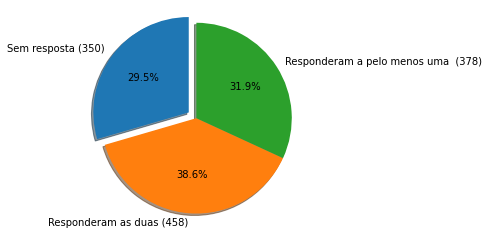

In [ ]:
fan_profile(1)

*Pergunta : Qual é o número de fãs apenas da franquia Star Wars? E apenas da franquia Star Trek? Das duas franquias ? De nenhuma franquia?*

Acerca das 458 pessoas que responderam às duas perguntas sobre se considerar ou não fã das franquias, podemos observar que o número de indivíduos fãs apenas de Star Wars é consideravelmente superior ao número de fãs apenas de Star Trek ou até mesmo, superior ao número de fãs ao mesmo tempo das duas franquias.

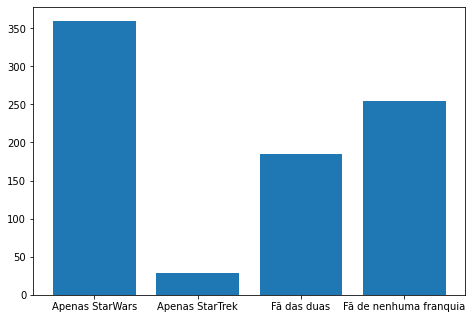

In [ ]:
fan_profile(2)

*Pergunta : Com relação aos fãs de nenhuma das franquias, quantos desses são mulheres e quantos são homens?*

As mulheres fazem parte de mais da metade do grupo de pessoas que não são fãs de nenhuma das duas franquias.

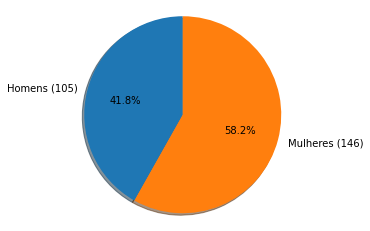

In [ ]:
gender_profile(1)

*Pergunta :Com relação aos fãs das duas franquias, qual é o gênero predominante?*

Se formos observar o perfil dos fãs das duas franquias, podemos observar que cerca de 70% desse grupo é composto por homens.

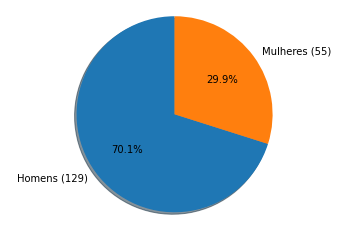

In [ ]:
gender_profile(2)

*Pergunta : Dos fãs apenas de Star Wars qual é o quantitativo de pessoas que não souberam responder quem atirou primeiro?*

Ao checarmos o grupo de fãs apenas da franquia Star Wars, observamos que apesar de fãs exclusivamente dessa franquia, parte dos entrevistados não souberam responder a pergunta sobre quem atirou primeiro. 

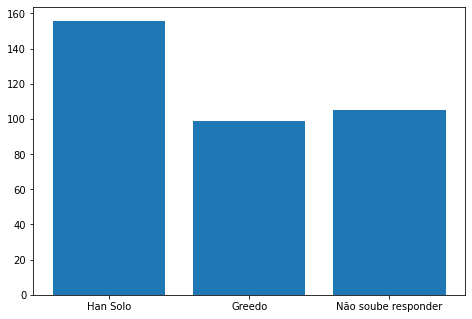

In [ ]:
guess_shooting(1)

*Pergunta : Dado que a pessoa assistiu ao filme e que ela seja de gênero feminino, quais são os filmes favoritos desse grupo em específico?*

Para o grupo de fãs exclusivamente de Star Wars composto apenas por mulheres que de fato assistiram aos filmes, podemos observar que o 'Retorno do Jedi' não é  considerado o favorito.

In [ ]:
execute_query2(connectionDatabase, query13)

('A ameaça fantasma',)
('O ataque dos clones',)
('A vingança dos Sith',)
('Uma nova esperança',)
('O império contra-ataca',)
